<a href="https://colab.research.google.com/github/sunkumx/internship-projects/blob/main/Task_3_Exploratory_Data_Analysis_Retail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**THE SPARKS FOUNDATION INTERNSHIP : Data Science and Business Analyst**

**Task 3 : Exploratory Data Analysis - Retail**

Task: Perform exploratory data analysis on dataset 'SampleSuperStore'

NAME: **Sunil Kumar R M**



In [1]:
#importing required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/content/SampleSuperstore.csv')

In [3]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
df.shape

(9994, 13)

In [5]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [6]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [8]:
# Correlation between the numeric datatype with one another

correlation=df.corr()
correlation

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


array([[<Axes: title={'center': 'Postal Code'}>,
        <Axes: title={'center': 'Sales'}>],
       [<Axes: title={'center': 'Quantity'}>,
        <Axes: title={'center': 'Discount'}>],
       [<Axes: title={'center': 'Profit'}>, <Axes: >]], dtype=object)

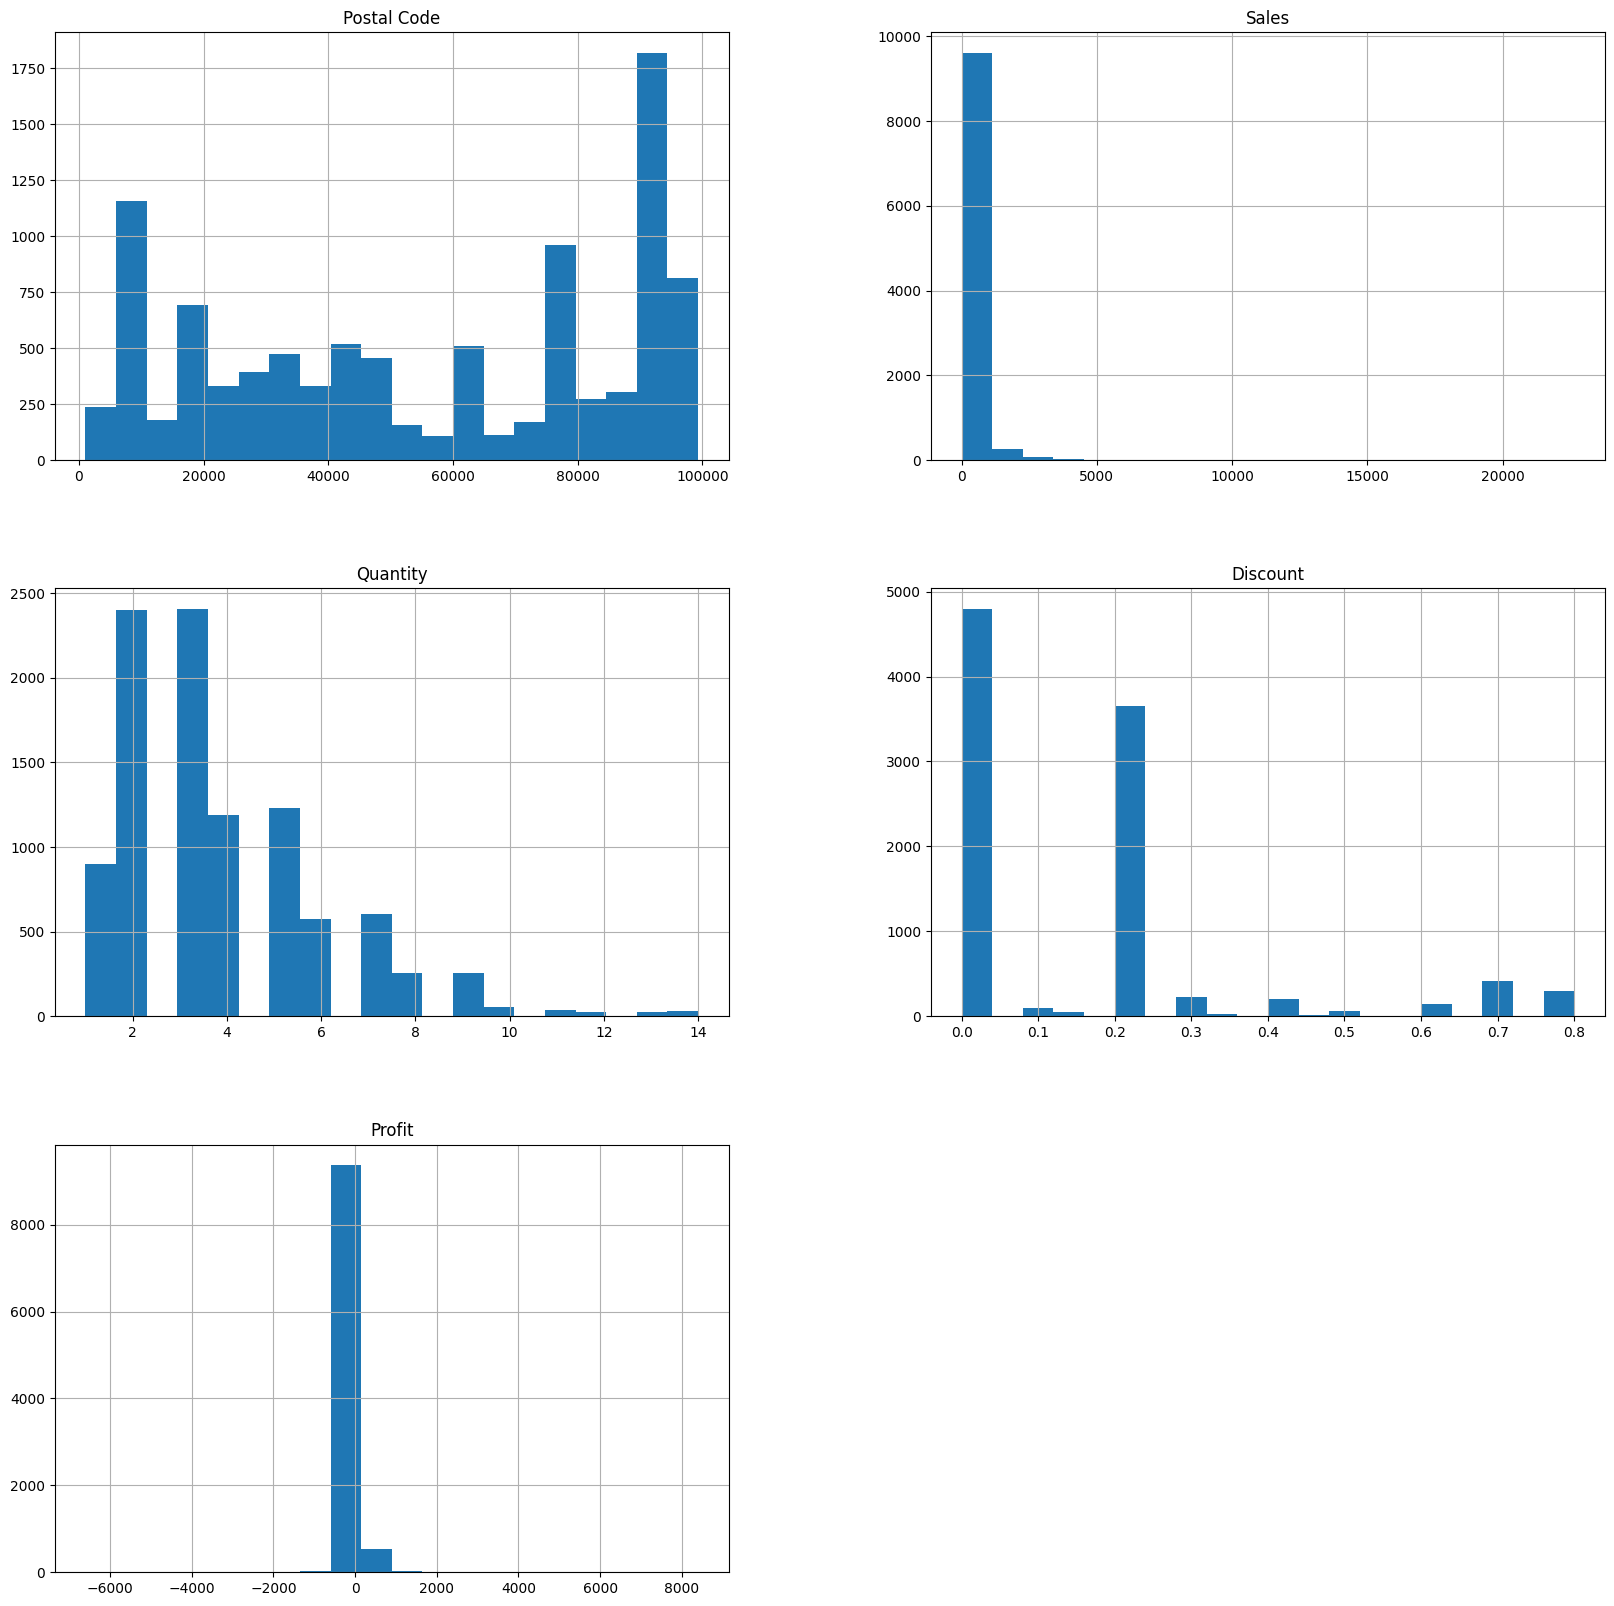

In [9]:
# Overall Brief Histogram Plot 

df.hist(bins=20, figsize=(20,20), )

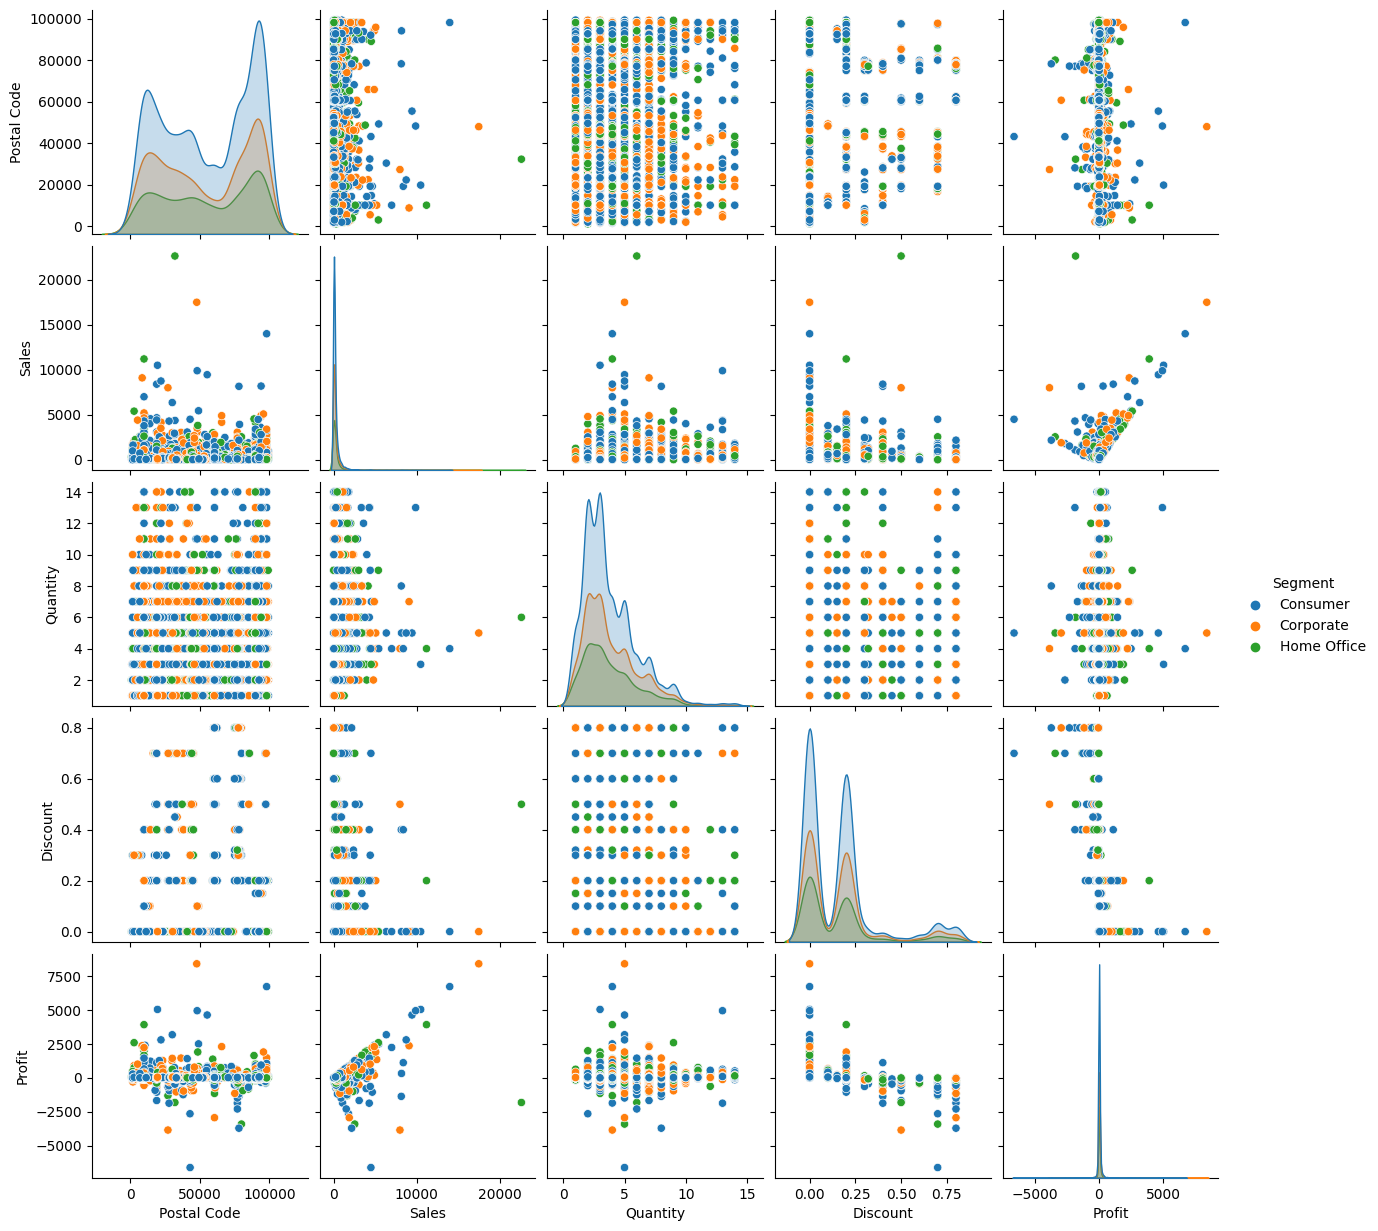

In [10]:
# Pairplot over (Segment)

sns.pairplot(df, hue='Segment')

<Axes: >

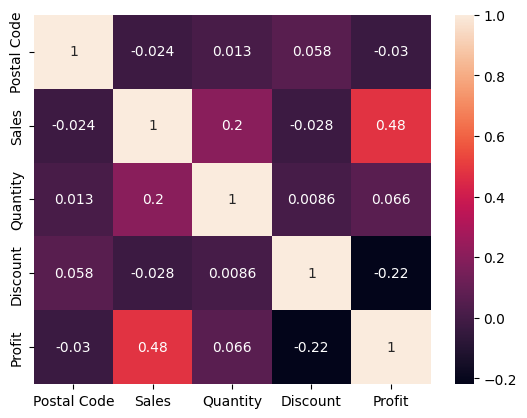

In [11]:
# Heatmap (correlation)

sns.heatmap(correlation,annot=True)

In [12]:
# Distributing Segment type over various inputs

df['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

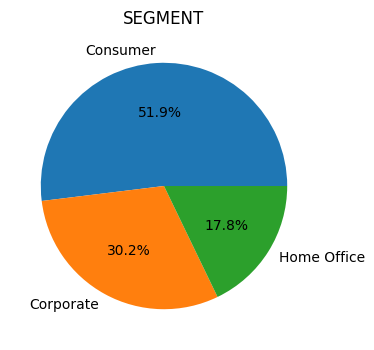

In [13]:
# Plotting Pie chart for the above

plt.figure(figsize=(4,4),dpi=100)
plt.pie(df['Segment'].value_counts(), labels=df['Segment'].value_counts().index, autopct='%1.1f%%')
plt.title('SEGMENT')
plt.show()

In [14]:
# State wise Sales depiction

State_inspection=df.groupby('State')['Sales'].sum()
State_inspection

State
Alabama                  19510.6400
Arizona                  35282.0010
Arkansas                 11678.1300
California              457687.6315
Colorado                 32108.1180
Connecticut              13384.3570
Delaware                 27451.0690
District of Columbia      2865.0200
Florida                  89473.7080
Georgia                  49095.8400
Idaho                     4382.4860
Illinois                 80166.1010
Indiana                  53555.3600
Iowa                      4579.7600
Kansas                    2914.3100
Kentucky                 36591.7500
Louisiana                 9217.0300
Maine                     1270.5300
Maryland                 23705.5230
Massachusetts            28634.4340
Michigan                 76269.6140
Minnesota                29863.1500
Mississippi              10771.3400
Missouri                 22205.1500
Montana                   5589.3520
Nebraska                  7464.9300
Nevada                   16729.1020
New Hampshire         

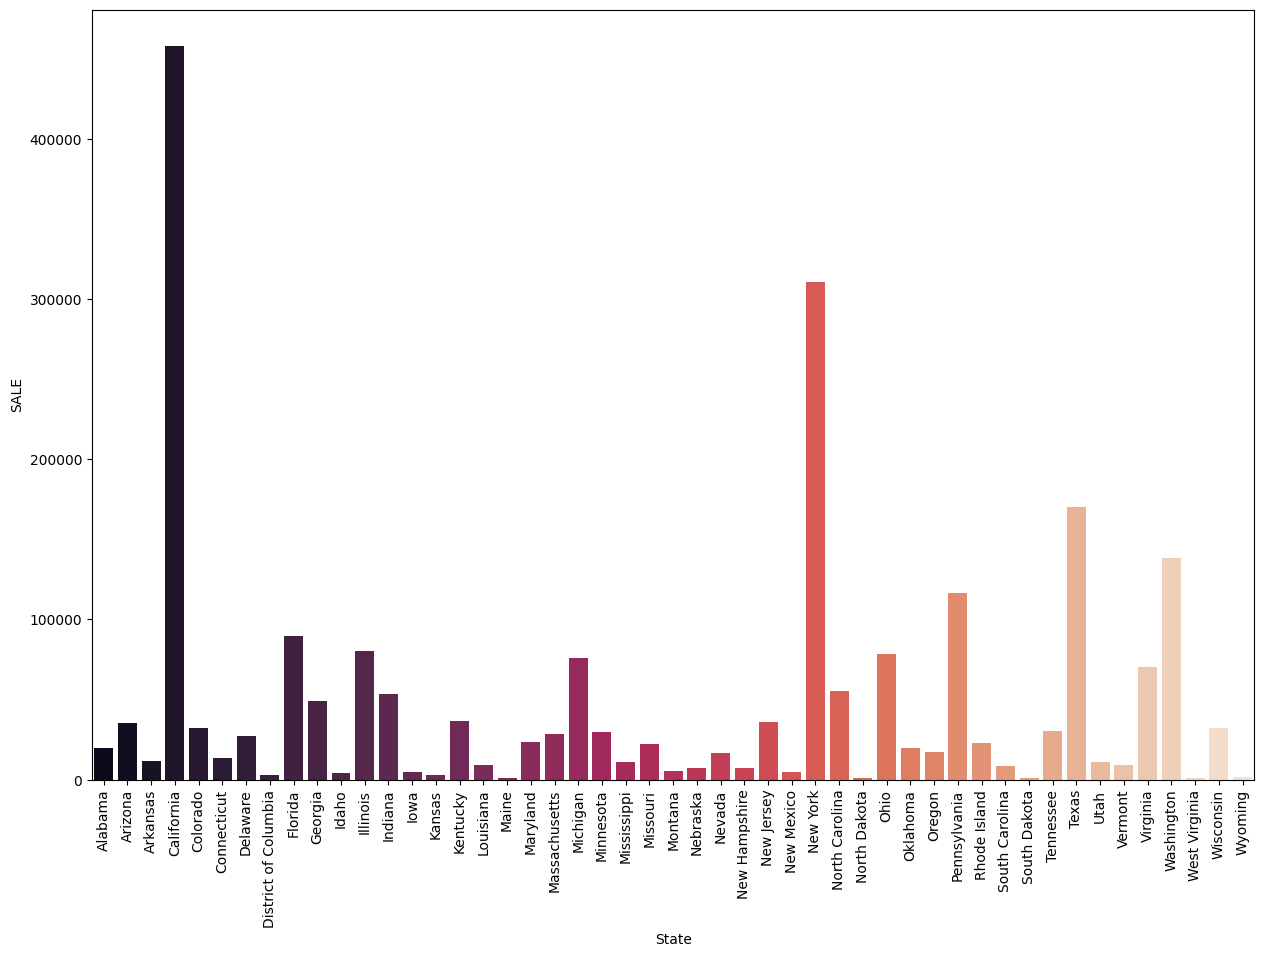

In [15]:
plt.figure(figsize=(15,10))
sns.barplot(x=State_inspection.index,y=State_inspection.values, palette='rocket')
plt.ylabel("SALE")
plt.xticks(rotation=90)
plt.show()

In [16]:
# Calculate total sales
total_sales = df['Sales'].sum()
print("Total Sales:", total_sales)

Total Sales: 2297200.8603000003


In [17]:
# Identify the best-selling products
best_selling_products = df.groupby('Category')['Quantity'].sum().nlargest(5)
print("Best-Selling Products:")
print(best_selling_products)

Best-Selling Products:
Category
Office Supplies    22906
Furniture           8028
Technology          6939
Name: Quantity, dtype: int64


In [18]:
# Analyze sales by region
sales_by_region = df.groupby('Region')['Sales'].sum()
print("Sales by Region:")
print(sales_by_region)

Sales by Region:
Region
Central    501239.8908
East       678781.2400
South      391721.9050
West       725457.8245
Name: Sales, dtype: float64


In [19]:
# Calculate average profit margin
df['Profit Margin'] = (df['Profit'] / df['Sales']) * 100
average_profit_margin = df['Profit Margin'].mean()
print("Average Profit Margin:", average_profit_margin)

Average Profit Margin: 12.031392972104458


<Axes: xlabel='State', ylabel='Sales'>

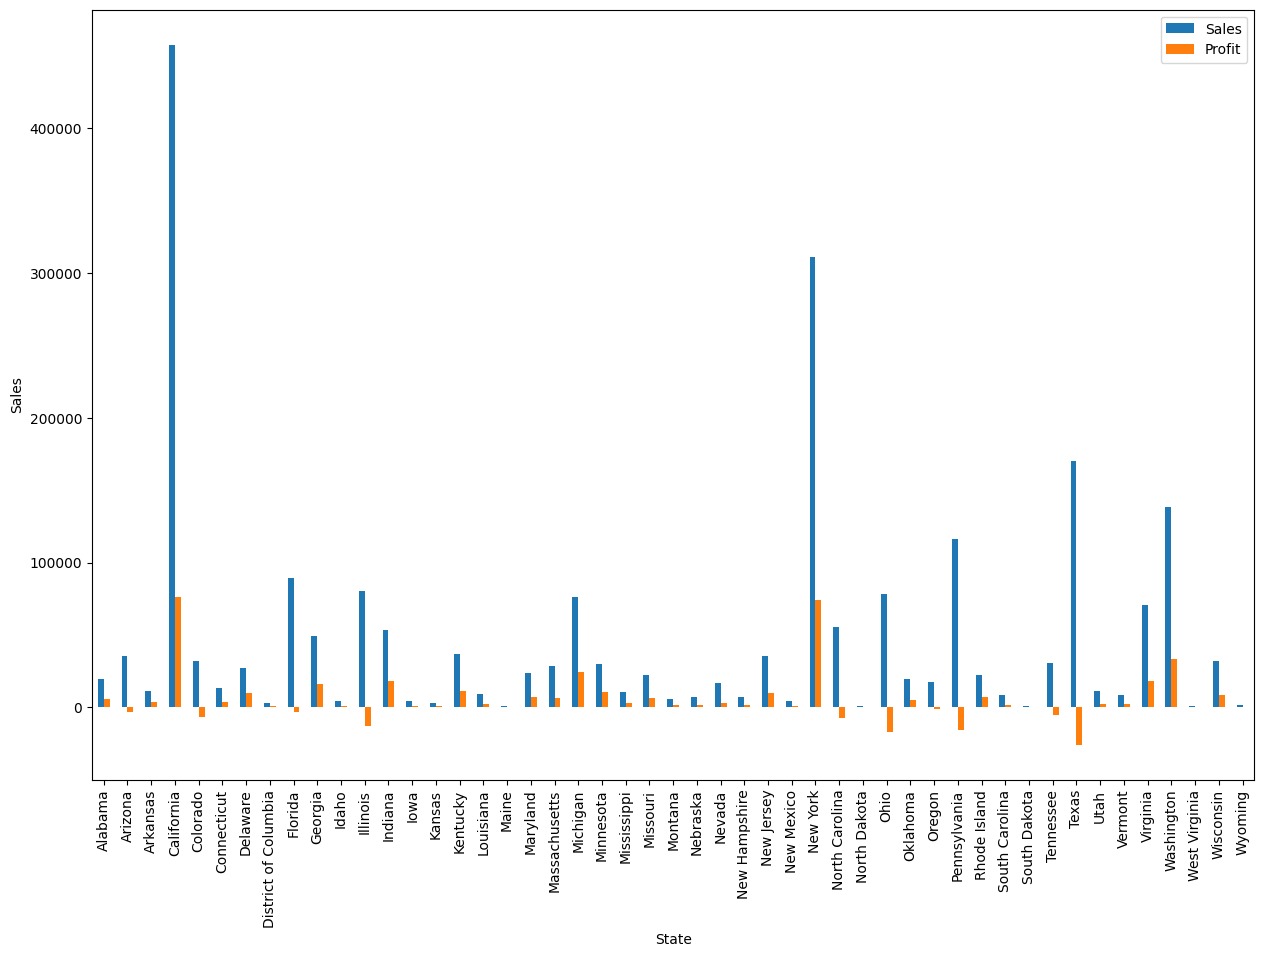

In [20]:
# Comparing simultaneously (Sales and Profit)-->State

Analysis=df.groupby('State')['Sales','Profit'].sum()
Analysis.plot.bar(figsize=(15,10), ylabel='Sales')

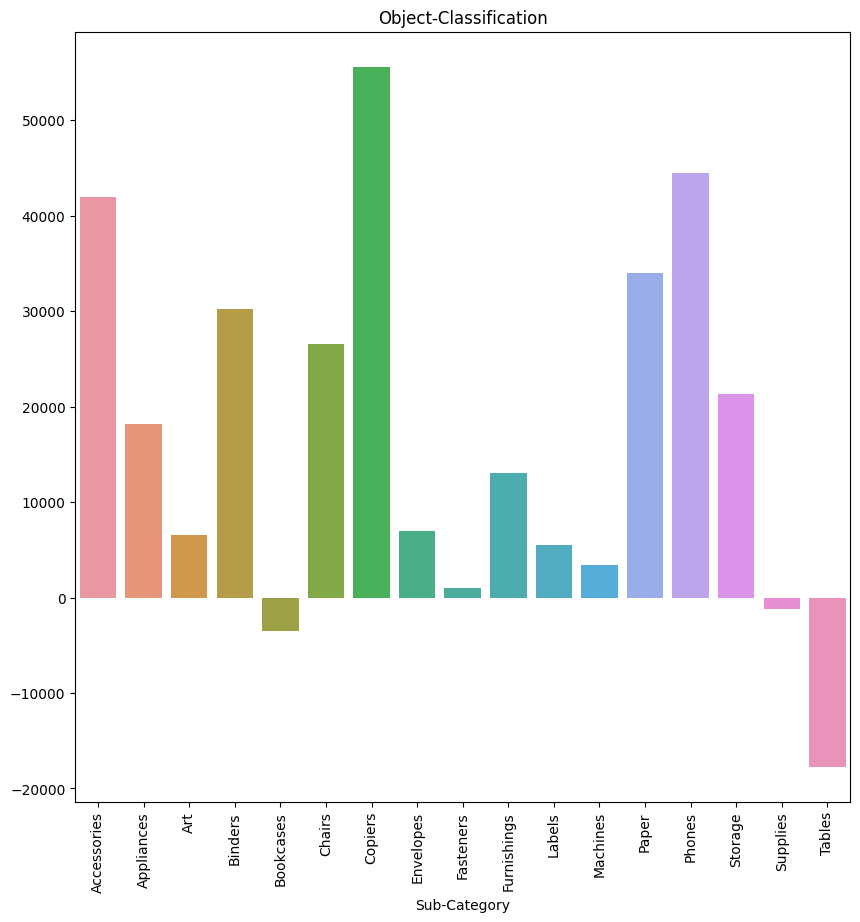

In [21]:
# Sub-Category Classification

objects=df.groupby('Sub-Category')['Profit'].sum()
plt.figure(figsize=(10,10))
sns.barplot(x=objects.index,y=objects.values)
plt.title('Object-Classification')
plt.xticks(rotation=90)
plt.show()

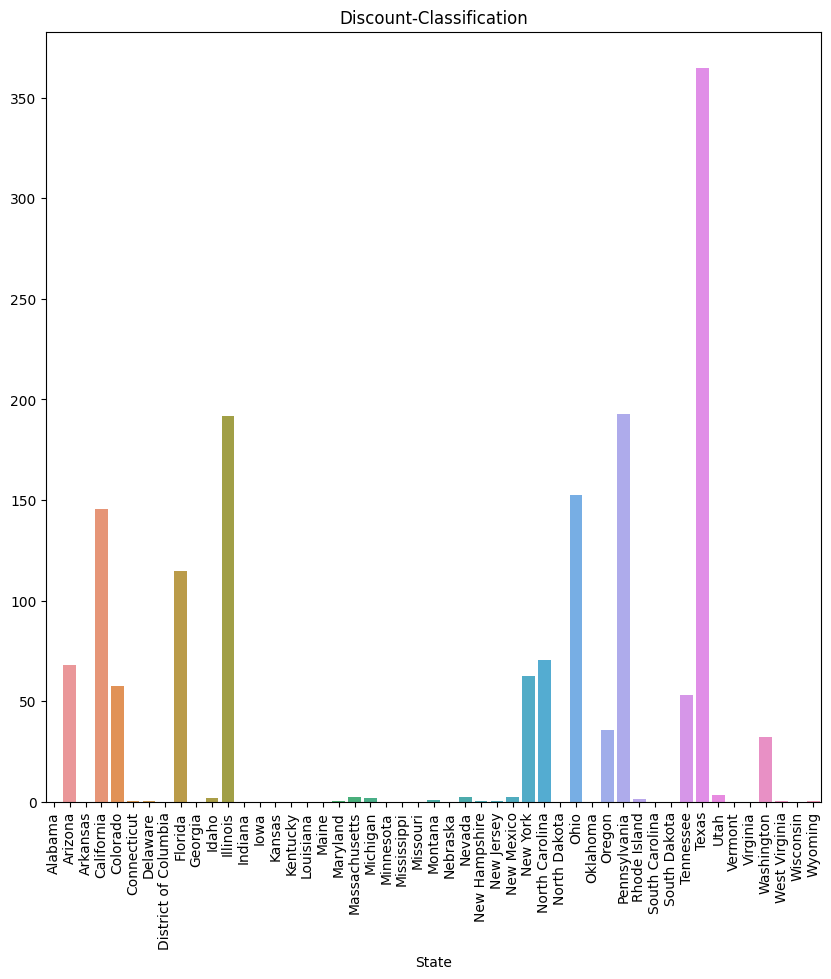

In [22]:
# Discount Classfication

discount_area=df.groupby('State')['Discount'].sum()
plt.figure(figsize=(10,10))
sns.barplot(x=discount_area.index,y=discount_area.values)
plt.title('Discount-Classification')
plt.xticks(rotation=90)
plt.show()

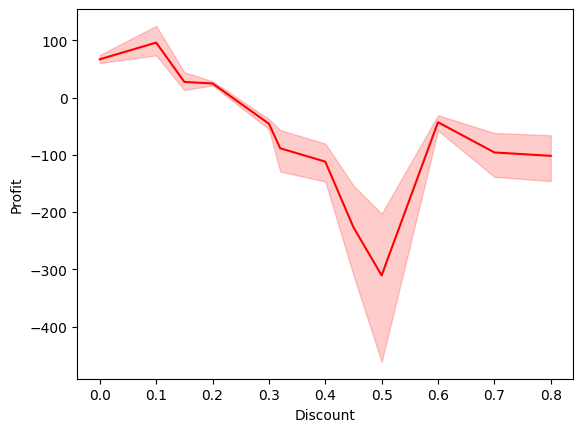

In [23]:
# Discount Dependency on Profit

sns.lineplot(x='Discount',y='Profit',data=df,color='red')
plt.show()

**OBSERVATIONS**

We observe a *positive correlation* between *SALES AND PROFIT (0.48)* whereas a *negative correlation* between *DISCOUNT AND PROFIT (-0.22)*

SEGMENT DIVISION 
1. Consumer: 51.9% 
2. Corporate: 30.2% 
3. Home Office: 17.8%

Ship Mode: 

Maximum people prefer to choose *Standard Class* followed by *Second Class*, *First Class* and at last Same Day

Profit-Area:

 Max. profitable States: **California and New York** 
 Improvement needed in States: Texas, Ohio, Illinois, Pennsylvania and North Carolina (Overall Loss)

Sub-Category (Objects): 

Need to revise Discount Rates over: Tables, Supplies, Bookcases Further Profit can be maximised if given priority to Fasteners, Machines and Labels

Discount:
 
 Need to revise Discount Rates in States: Texas, Ohio, Pennsylvania, Illinois and Florida

Dependency Relation: 

With Increase in Discount Rates, Overall Profit Reduces. Hence, negative Correlation as observed through heatmap. Reducing discounted rates to further percent would significantly help weaker areas across United States to maximize profits.